# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
#Create path

path = r'C:\Users\ryanc\OneDrive\Documents\Data Analytics Exercises\Achievement 6'

In [3]:
# Import FRED transport data

df = pd.read_csv(os.path.join(path, 'DJTA.csv'))

#### Note: I had a very difficult time finding any appropriate data from quandl. I found transportation time series data from https://fred.stlouisfed.org/series/DJTA and will be using that in this exercise. This connects to my broader research topic of transportation.

### 2. Subsetting, wrangling, and cleaning time-series data

In [4]:
df.head(25)

,DATE,DJTA
0,2018-11-12,10366.51
1,2018-11-13,10433.45
2,2018-11-14,10456.61
3,2018-11-15,10615.30
4,2018-11-16,10583.60
5,2018-11-19,10534.46
6,2018-11-20,10212.94
7,2018-11-21,10365.53
8,2018-11-22,.
9,2018-11-23,10369.01


In [5]:
# Replace '.' with Nan

df.replace('.', np.nan, inplace=True)

##### The '.'s in the dataset as opposed to blank values or NaN's made it unable to convert the DJTA value from an object to float64 which was necessary to plot.

In [6]:
df.head(25)

,DATE,DJTA
0,2018-11-12,10366.51
1,2018-11-13,10433.45
2,2018-11-14,10456.61
3,2018-11-15,10615.30
4,2018-11-16,10583.60
5,2018-11-19,10534.46
6,2018-11-20,10212.94
7,2018-11-21,10365.53
8,2018-11-22,NaN
9,2018-11-23,10369.01


In [7]:
df.shape

(1305, 2)

In [8]:
df.columns

Index(['DATE', 'DJTA'], dtype='object')

In [10]:
#Change datatype from object to float64 to be able to plot it

df['DJTA'] = df['DJTA'].astype('float64')

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
#Make a subset of the data

df_sub = df.loc[(df['DATE'] >= '2018-11-31') & (df['DATE'] < '2021-12-31')]

### Question 3:  In a markdown cell below the subset explain what logic you were following when selecting your data points.
I chose to make a subset of this data containing 1 year before and after my main data set which has the time frame of December 2019 and December 2020. Therefore this dataset is going to be from December 2018 to December 2021.

In [13]:
df_sub.shape

(804, 2)

In [14]:
df_sub.head()

,DATE,DJTA
15,2018-12-03,10850.44
16,2018-12-04,10374.07
17,2018-12-05,NaN
18,2018-12-06,10358.70
19,2018-12-07,9951.16


In [15]:
# Set the "Date" column as the index

from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['DATE']) # Create a datetime column from "Date.""
df_sub = df_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
df_sub.drop(['DATE'], axis=1, inplace=True) # Drop the "Date" column.
df_sub.head()

,DJTA
datetime,
2018-12-03,10850.44
2018-12-04,10374.07
2018-12-05,NaN
2018-12-06,10358.70
2018-12-07,9951.16


### Question 4: Make a line chart of your data

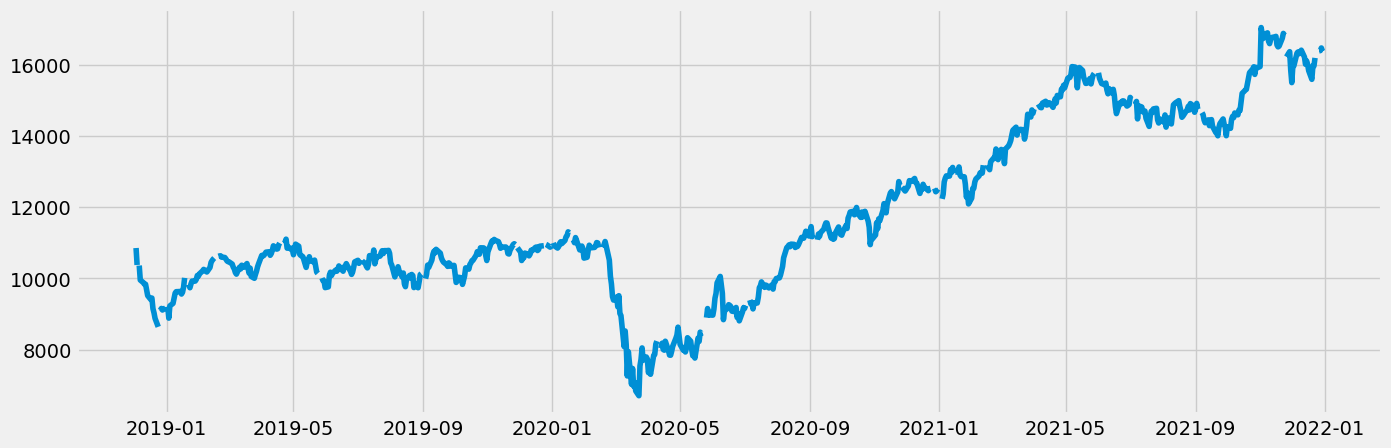

In [18]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [21]:
# Check for missing values

df_sub.isnull().sum() 

DJTA    29
dtype: int64

In [23]:
# Impute missing values

df_sub.fillna(method='ffill', inplace=True)

In [24]:
df_sub.isnull().sum()

DJTA    0
dtype: int64

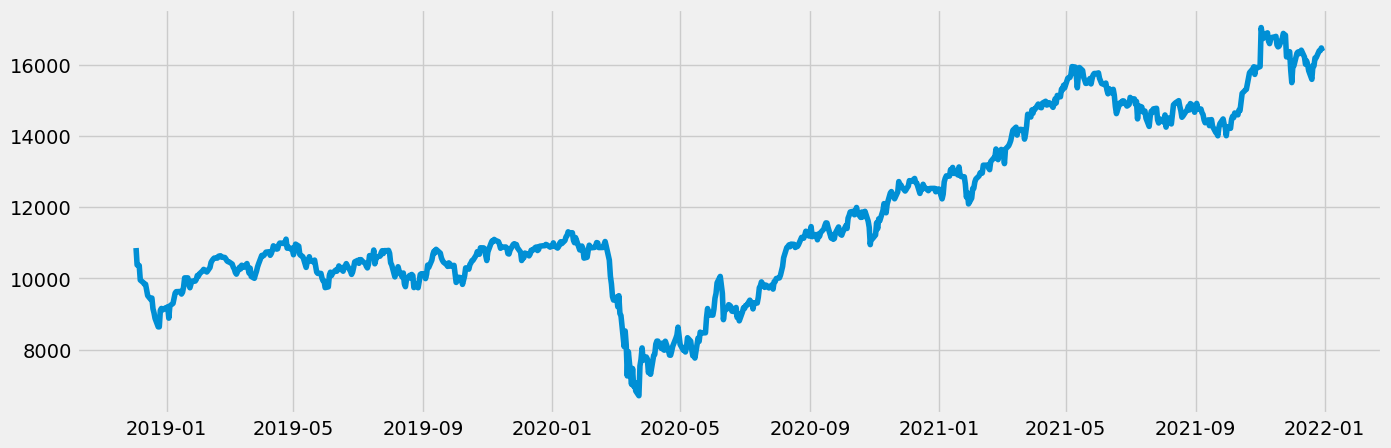

In [25]:
# Plot the new data set to view it with missing values changed

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [27]:
# Check for duplicates

dups = df_sub.duplicated()
dups.sum()

31

In [39]:
df_sub_2 = df_sub.drop_duplicates()

In [40]:
# Check for duplicates

dups = df_sub_2.duplicated()
dups.sum()

0

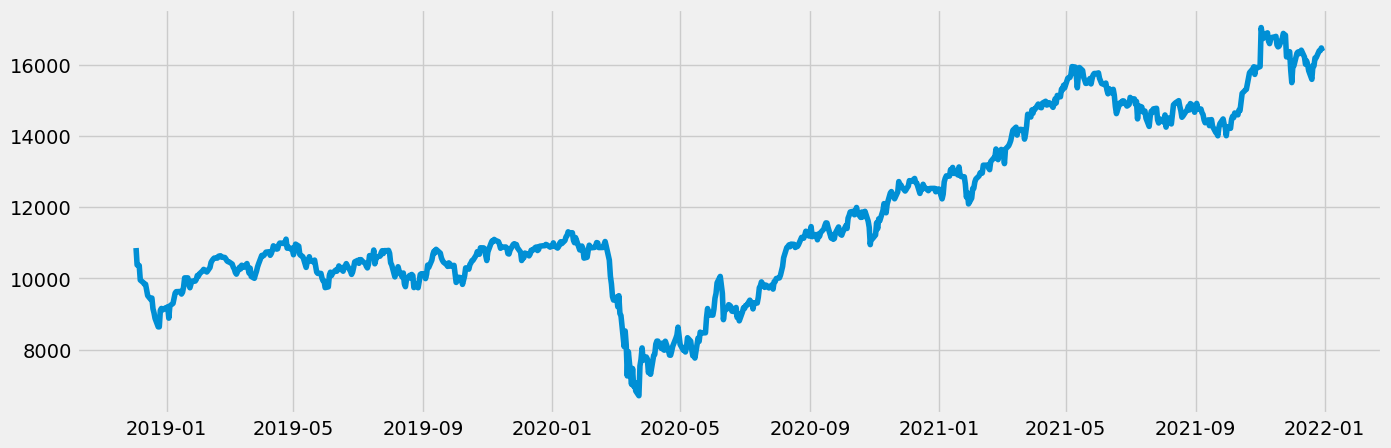

In [41]:
# Plot the new data set with duplicates removed

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

### 3. Time-series analysis: decomposition

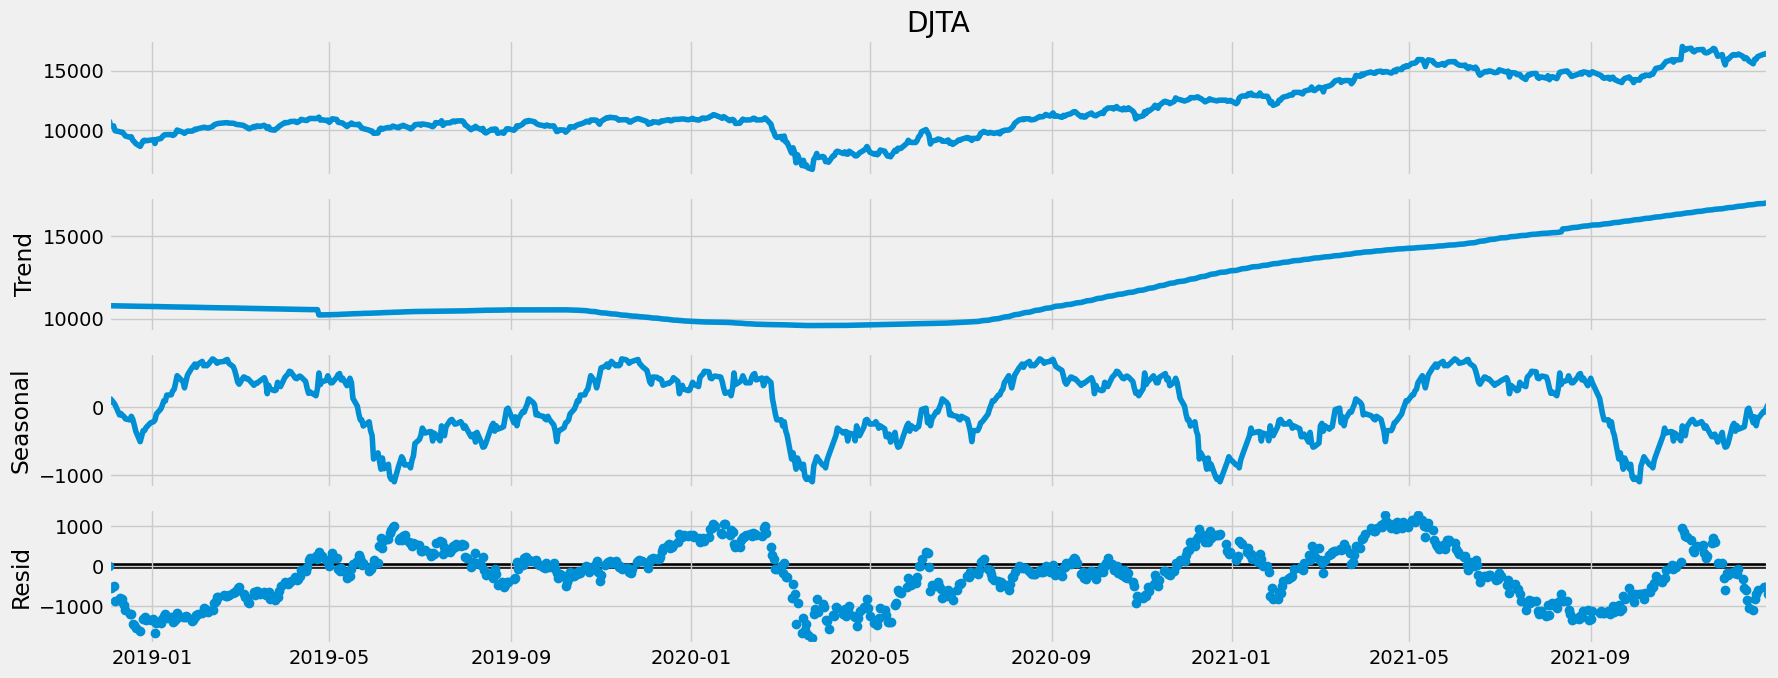

In [62]:
result_add = sm.tsa.seasonal_decompose(x=df_sub_2['DJTA'], model='additive', extrapolate_trend='freq', period=int(len(df_sub_2)/4))
plt.rcParams.update({'figure.figsize': (18,7)})
result_add.plot()
plt.show()

#Note: Had to add a 'period' as my data has missing days due to weekends and was given an error without adding this.


### Question 5: Decompose the data’s components. Analyze the results from the plot in a markdown cell.
The seasonality that has been extracted is interesting in that it drops roughly every 9 months. The drop does not correlate to the same month every year but consistently occurs nearly every 9 months. These are 2019-06, 2020-03, 2020-12 and 2021-09. THe residual noise below the seasonality trend alternates between matching it's peaks and valleys and then being the inverse of seasonality's peak or valley. 

### 4. Testing for stationarity

In [53]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub_2['DJTA'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.564626
p-value                          0.878777
Number of Lags Used              9.000000
Number of Observations Used    763.000000
Critical Value (1%)             -3.438950
Critical Value (5%)             -2.865335
Critical Value (10%)            -2.568791
dtype: float64


### Question 6: Conduct a Dickey-Fuller test to check for stationarity. Interpret the results in a markdown cell and reference your null hypothesis.
Our test statistic of -0.5646 is larger than any Critical Value (1%, 5% or even 10%). Therefore we cannot reject our null hypothesis and we see that our data does indeed have a unit root. Next we will confirm this by checking our autocorrelations. If a unit root is confirmed we will attempt to make our Time Series Data stationary.

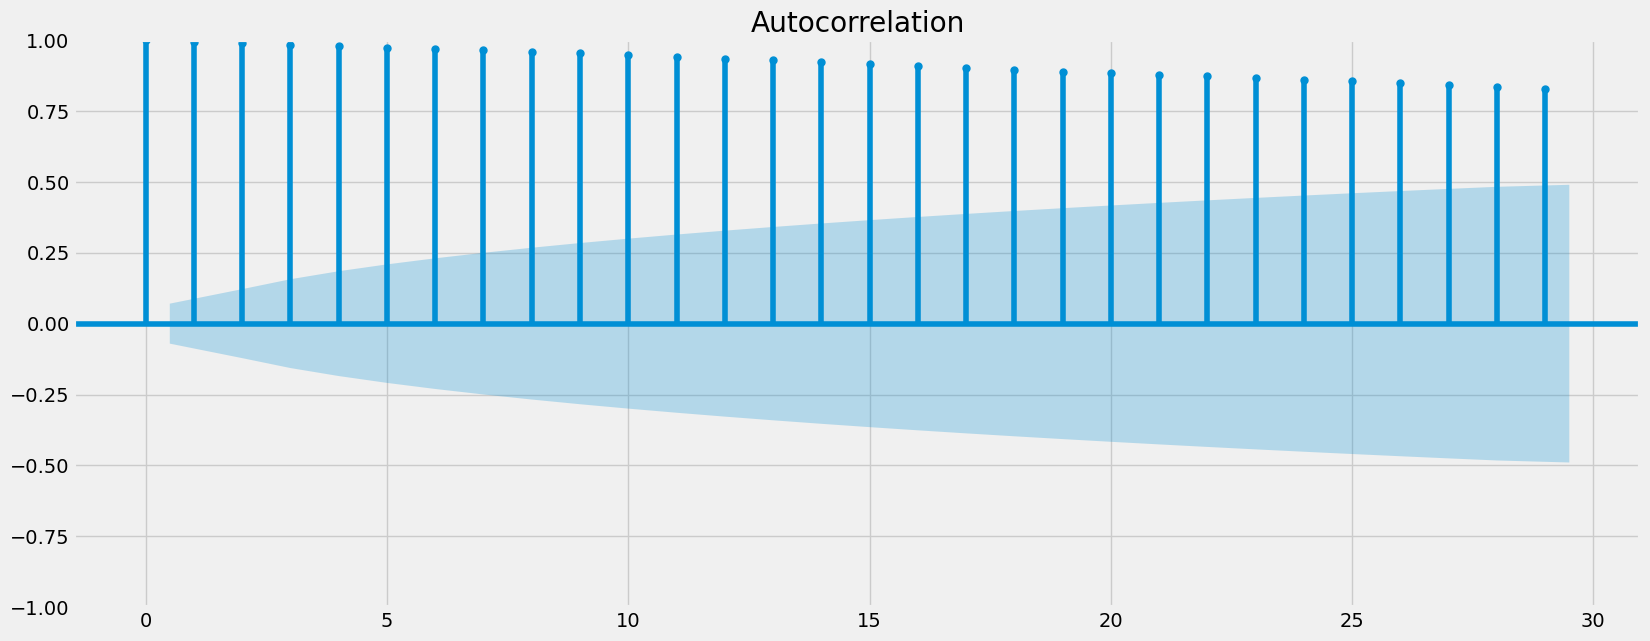

In [54]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_sub_2)
plt.show()

### Question 6 Continued:
The autocorrelation chart confirms that our data has a unit root as there are not only more than 10 lags above the confidence interval but every lag is above the confidence interval.

### 5. Stationarizing the Data

In [55]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff = df_sub_2 - df_sub_2.shift(1) 

In [56]:
# Remove the missing values that came about as a result of the differencing. 

data_diff.dropna(inplace = True) 

In [57]:
data_diff.head()

,DJTA
datetime,
2018-12-04,-476.37
2018-12-06,-15.37
2018-12-07,-407.54
2018-12-10,-74.62
2018-12-11,-45.54


In [58]:
data_diff.columns

Index(['DJTA'], dtype='object')

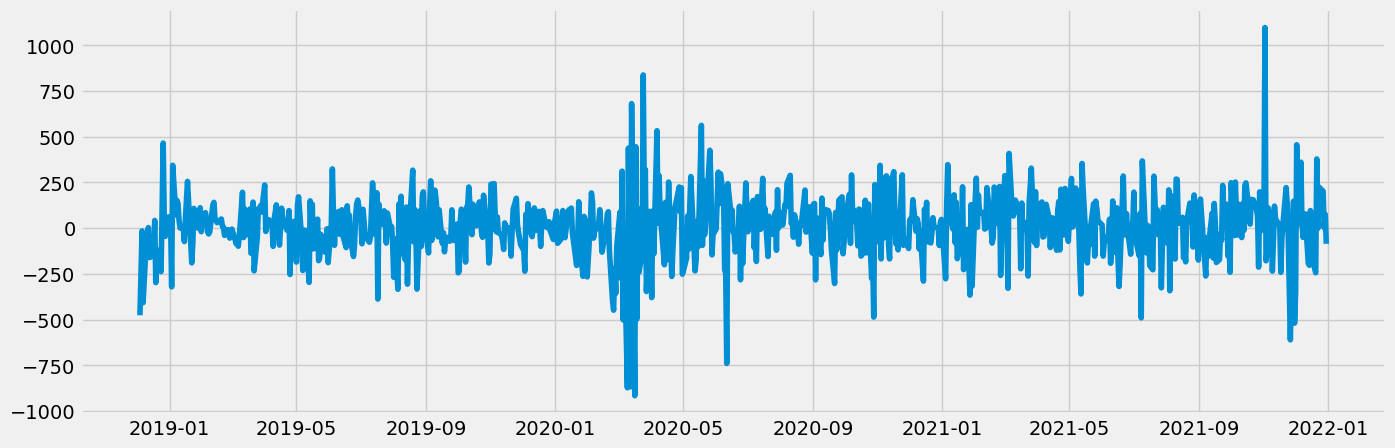

In [59]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [60]:
# Repeat the dickey-fuller test

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.944178e+00
p-value                        3.253268e-12
Number of Lags Used            8.000000e+00
Number of Observations Used    7.630000e+02
Critical Value (1%)           -3.438950e+00
Critical Value (5%)           -2.865335e+00
Critical Value (10%)          -2.568791e+00
dtype: float64


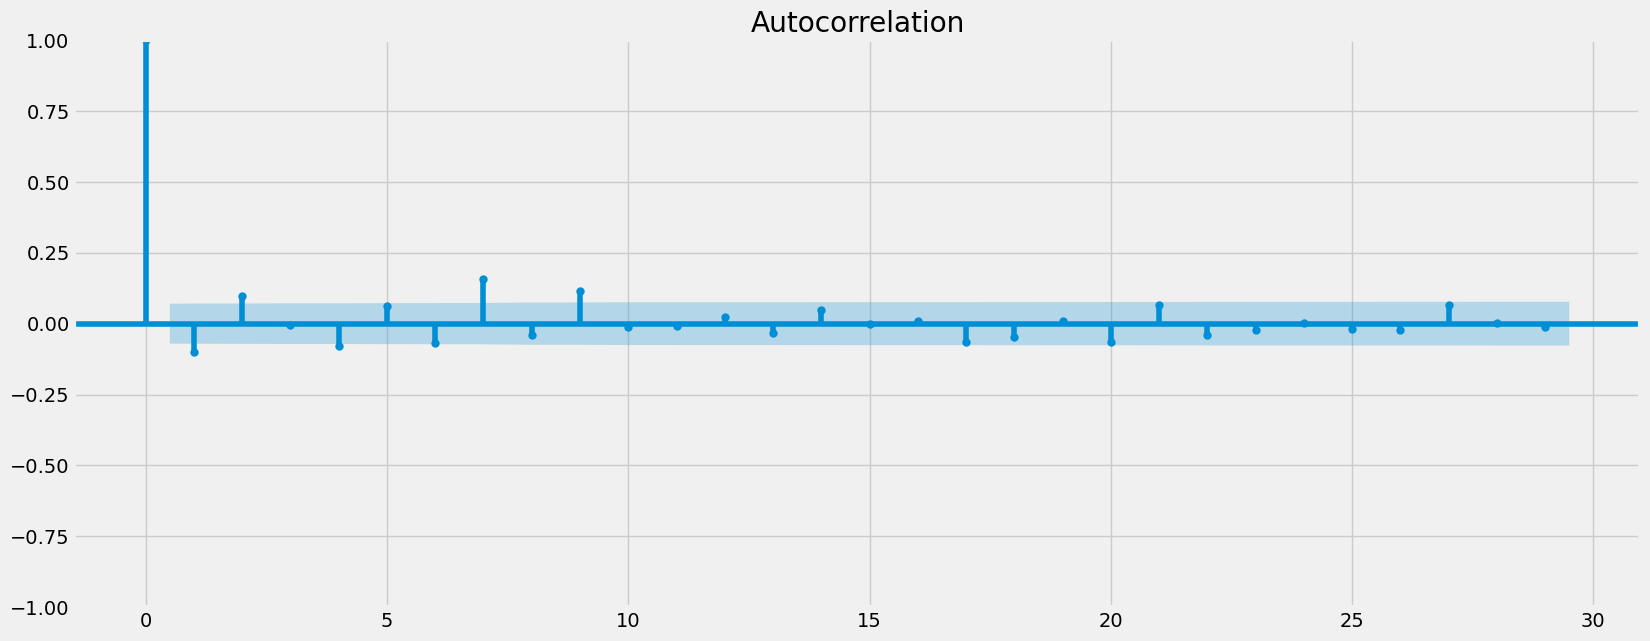

In [61]:
#Check thr autocorrelations

plot_acf(data_diff)
plt.show()

### Success! 
After one round of differencing we see that our test statistic is now lower than any of our Confidence Intervals. We can not reject our null hypothesis and embrace the alternative that there is no unit root in our data. This is confirmed when looking at the autocorrelation chart as we have many less lags above the confidence interval. Our data is now stationary.